In [35]:
import cv2
import pytesseract
import os

In [62]:
os.chdir(r'C://Users/Omarm/Desktop/OCR')
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [63]:
def display(image_file):
    """
    This function is used to  display images in their actual size in the notebook
    """
    import matplotlib.pyplot as plt
    dpi = 80.                               #Dots per Inch
    img = plt.imread(image_file)            #Reads the image from the given path
    height, width = img.shape[:2]           #Get the image dimension
    figsize = height/dpi, width/dpi         #Calculate figure size
    plt.figure(figsize=figsize)             #Create a figure
    plt.axis('off')                         #Hide axes
    plt.imshow(img, cmap='gray')            #Display the image
    plt.show()                              #Renders the figure and displays the image inline

#### Load the image

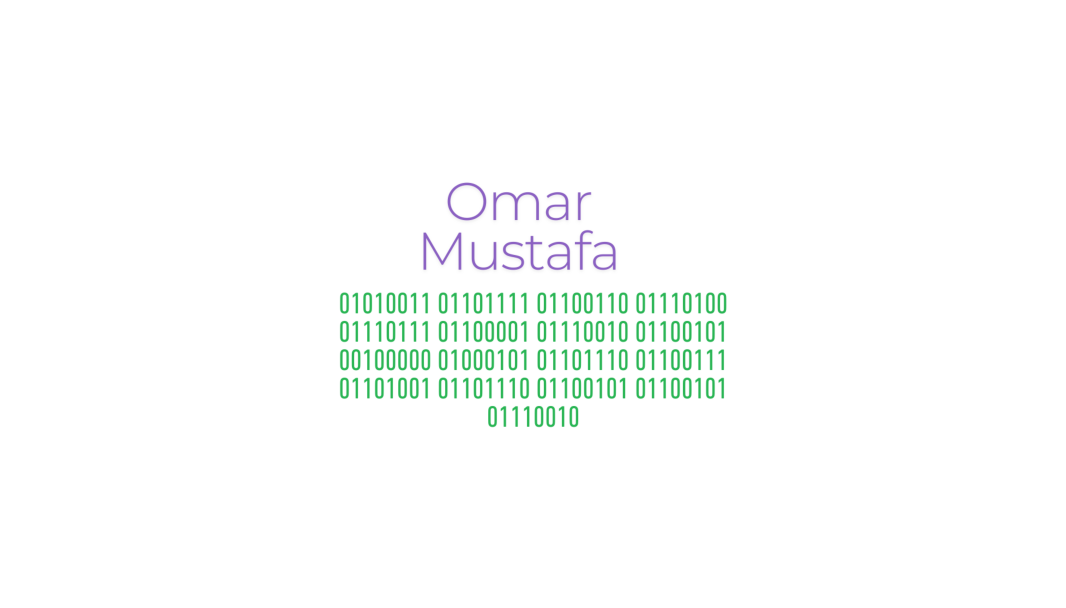

In [64]:
image_file = 'temp/Omar.png'
img = cv2.imread(image_file).copy()
display(image_file)

In [65]:
Himg, Wimg, _ = img.shape
#Let's try the conventional method image_to_string
result = pytesseract.pytesseract.image_to_string(img)
print(result)

Omar
Mustafa

01010011 01101111 01100110 01110100

01110111 01100001 01110010 01100101

00100000 01000101 01101110 01100111

01101001 01101110 01100101 01100101
01110010



In [66]:
#Let's try image_to_boxes to draw boxes around the characters
boxes = pytesseract.pytesseract.image_to_boxes(img, lang='eng')
print(boxes)

O 802 692 874 762 0
m 886 693 970 744 0
a 944 692 1004 762 0
r 982 692 1066 744 0
M 758 602 828 670 0
u 846 601 892 653 0
s 902 601 943 653 0
t 945 601 979 664 0
a 985 601 1027 653 0
f 1036 602 1069 675 0
a 1069 601 1111 653 0
0 605 521 621 560 0
1 628 522 638 560 0
0 648 521 664 560 0
1 671 522 681 560 0
0 691 521 707 560 0
0 712 521 728 560 0
1 735 522 745 560 0
1 756 522 766 560 0
0 786 521 802 560 0
1 809 522 819 560 0
1 831 522 841 560 0
0 850 521 866 560 0
1 873 522 883 560 0
1 895 522 904 560 0
1 916 522 926 560 0
1 937 522 947 560 0
0 971 521 983 560 0
1 991 522 1000 560 0
1 1012 522 1022 560 0
0 1031 521 1047 560 0
0 1053 521 1069 560 0
1 1076 522 1086 560 0
1 1097 522 1107 560 0
0 1117 521 1131 560 0
0 1151 521 1165 560 0
1 1172 522 1181 560 0
1 1193 522 1203 560 0
1 1214 522 1224 560 0
0 1234 521 1250 560 0
1 1257 522 1267 560 0
0 1276 521 1292 560 0
0 1298 521 1314 560 0
0 605 469 621 508 0
1 628 470 638 508 0
1 650 470 659 508 0
1 671 470 681 508 0
0 691 469 707 508 0
1 71

In [67]:
#lets draw rectangles around the characters
for b in boxes.splitlines():
    b = b.split(" ")
    print(b)
    char, x1, y1, x2, y2, _ = b
    # OpenCV uses (x, y) with (0,0) at the top-left. Tesseract's y-coordinates are flipped.
    y1, y2 = Himg - int(y1), Himg - int(y2)
    x1, x2 = int(x1), int(x2)
    # Draw a rectangle
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    #cv2.putText(img, b[0], (x1+10, y1+15), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0,0,255), 1)

['O', '802', '692', '874', '762', '0']
['m', '886', '693', '970', '744', '0']
['a', '944', '692', '1004', '762', '0']
['r', '982', '692', '1066', '744', '0']
['M', '758', '602', '828', '670', '0']
['u', '846', '601', '892', '653', '0']
['s', '902', '601', '943', '653', '0']
['t', '945', '601', '979', '664', '0']
['a', '985', '601', '1027', '653', '0']
['f', '1036', '602', '1069', '675', '0']
['a', '1069', '601', '1111', '653', '0']
['0', '605', '521', '621', '560', '0']
['1', '628', '522', '638', '560', '0']
['0', '648', '521', '664', '560', '0']
['1', '671', '522', '681', '560', '0']
['0', '691', '521', '707', '560', '0']
['0', '712', '521', '728', '560', '0']
['1', '735', '522', '745', '560', '0']
['1', '756', '522', '766', '560', '0']
['0', '786', '521', '802', '560', '0']
['1', '809', '522', '819', '560', '0']
['1', '831', '522', '841', '560', '0']
['0', '850', '521', '866', '560', '0']
['1', '873', '522', '883', '560', '0']
['1', '895', '522', '904', '560', '0']
['1', '916', '522'

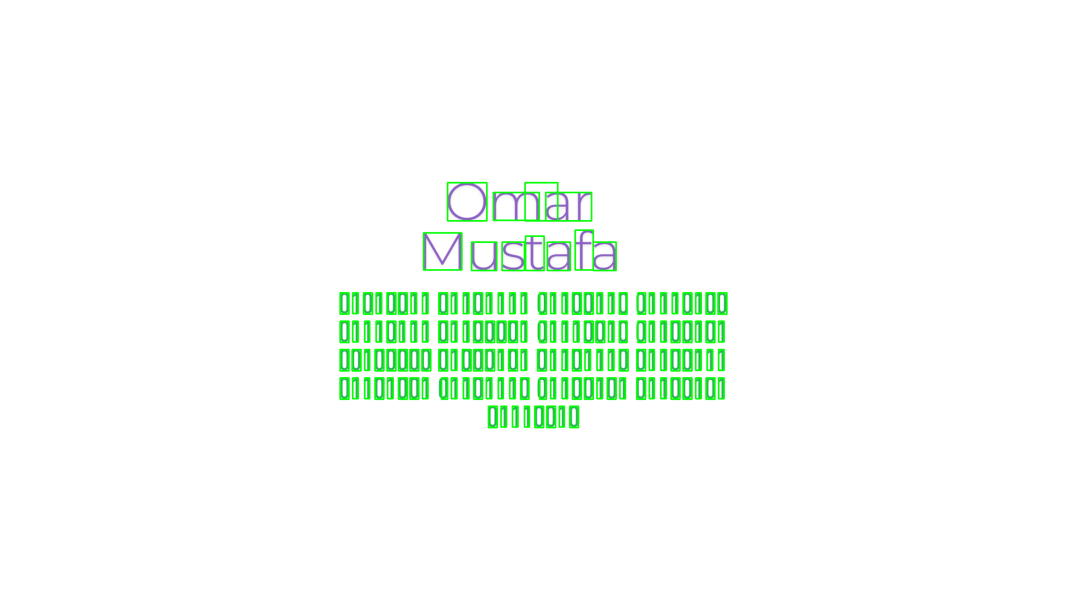

In [68]:
cv2.imwrite('temp/OmarRectangled.png', img)
display('temp/OmarRectangled.png')

#### Let's try to detect words instead of characters

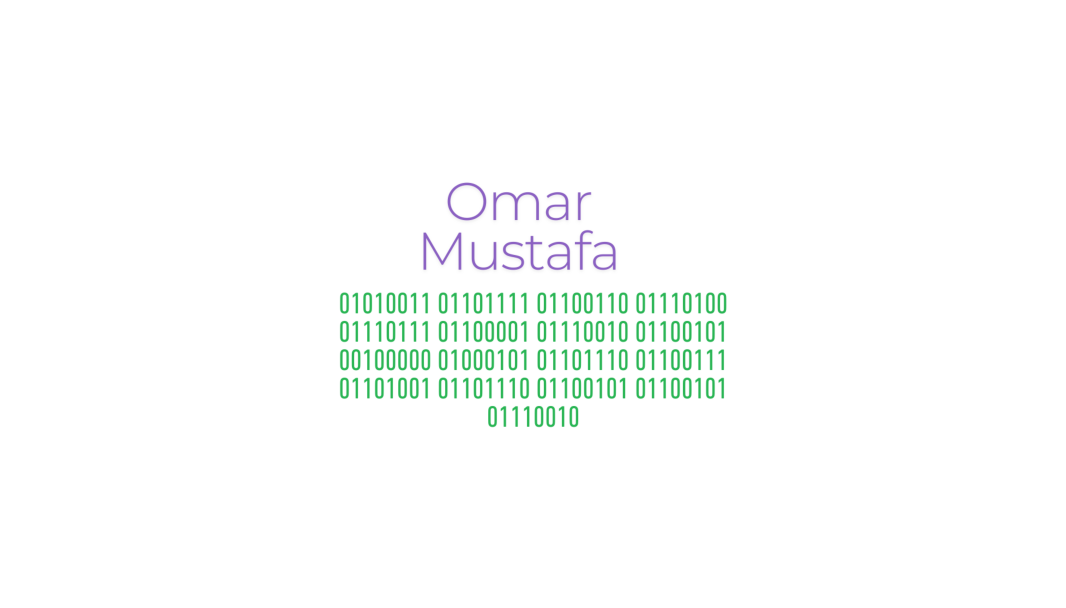

In [69]:
img_2 = cv2.imread(image_file).copy()
display(image_file)

In [70]:
boxes = pytesseract.image_to_data(img_2, lang='eng')
print(boxes)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1920	1080	-1	
2	1	1	0	0	0	758	318	353	161	-1	
3	1	1	1	0	0	758	318	353	161	-1	
4	1	1	1	1	0	802	318	264	70	-1	
5	1	1	1	1	1	802	318	264	70	94.271446	Omar
4	1	1	1	2	0	758	405	353	74	-1	
5	1	1	1	2	1	758	405	353	74	85.597816	Mustafa
2	1	2	0	0	0	605	520	709	247	-1	
3	1	2	1	0	0	605	520	709	39	-1	
4	1	2	1	1	0	605	520	709	39	-1	
5	1	2	1	1	1	605	520	161	39	89.001831	01010011
5	1	2	1	1	2	786	520	161	39	89.001831	01101111
5	1	2	1	1	3	971	520	160	39	91.645889	01100110
5	1	2	1	1	4	1151	520	163	39	93.646004	01110100
3	1	2	2	0	0	605	572	704	39	-1	
4	1	2	2	1	0	605	572	704	39	-1	
5	1	2	2	1	1	605	572	161	39	90.707565	01110111
5	1	2	2	1	2	786	572	161	39	90.707565	01100001
5	1	2	2	1	3	971	572	160	39	95.315926	01110010
5	1	2	2	1	4	1151	572	158	39	90.766434	01100101
3	1	2	3	0	0	605	624	704	39	-1	
4	1	2	3	1	0	605	624	704	39	-1	
5	1	2	3	1	1	605	624	166	39	95.890053	00100000
5	1	2	3	1	2	786	624	161	39	93.388756	010

In [71]:
for x, b in enumerate(boxes.splitlines()):
    if x != 0:
        b = b.split()
        print(b)

['1', '1', '0', '0', '0', '0', '0', '0', '1920', '1080', '-1']
['2', '1', '1', '0', '0', '0', '758', '318', '353', '161', '-1']
['3', '1', '1', '1', '0', '0', '758', '318', '353', '161', '-1']
['4', '1', '1', '1', '1', '0', '802', '318', '264', '70', '-1']
['5', '1', '1', '1', '1', '1', '802', '318', '264', '70', '94.271446', 'Omar']
['4', '1', '1', '1', '2', '0', '758', '405', '353', '74', '-1']
['5', '1', '1', '1', '2', '1', '758', '405', '353', '74', '85.597816', 'Mustafa']
['2', '1', '2', '0', '0', '0', '605', '520', '709', '247', '-1']
['3', '1', '2', '1', '0', '0', '605', '520', '709', '39', '-1']
['4', '1', '2', '1', '1', '0', '605', '520', '709', '39', '-1']
['5', '1', '2', '1', '1', '1', '605', '520', '161', '39', '89.001831', '01010011']
['5', '1', '2', '1', '1', '2', '786', '520', '161', '39', '89.001831', '01101111']
['5', '1', '2', '1', '1', '3', '971', '520', '160', '39', '91.645889', '01100110']
['5', '1', '2', '1', '1', '4', '1151', '520', '163', '39', '93.646004', '011

In [74]:
for x, b in enumerate(boxes.splitlines()):
    if x != 0:
        b = b.split()
        if len(b) == 12:
            x, y, w, h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
            cv2.rectangle(img_2, (x,y), (x+w, y+h), (0,255,0), 3) 
            cv2.putText(img_2, b[11], (x,y), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 3)

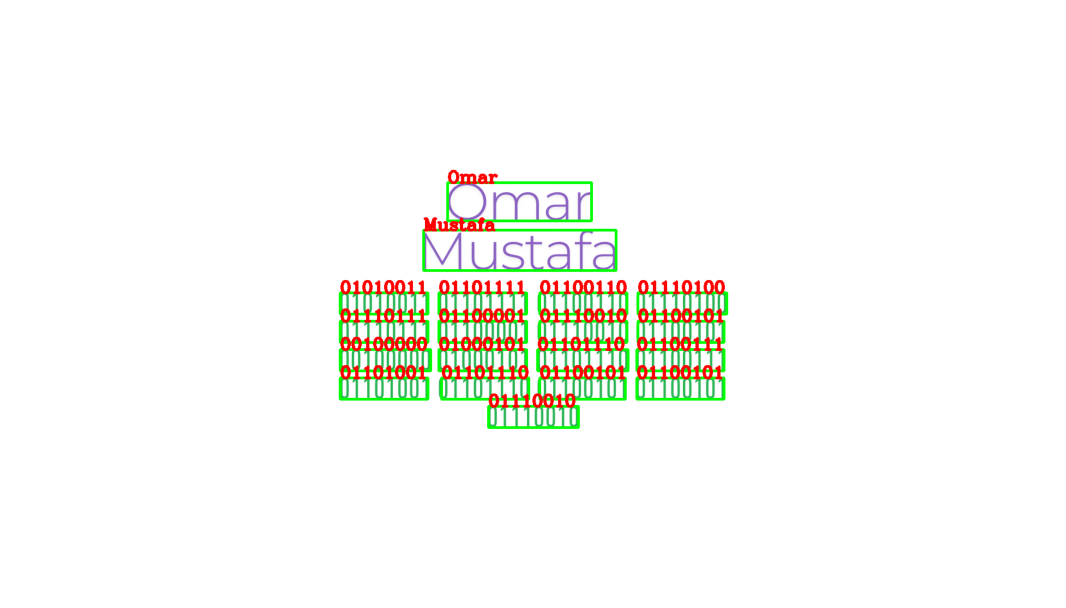

In [75]:
cv2.imwrite('temp/OmarWordsRectangled.png', img_2)
display('temp/OmarWordsRectangled.png')

#### What if we only needed to detect the numbers?

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1920	1080	-1	
2	1	1	0	0	0	605	318	709	449	-1	
3	1	1	1	0	0	605	520	709	39	-1	
4	1	1	1	1	0	605	520	709	39	-1	
5	1	1	1	1	1	605	520	709	39	0.000000	01010011011011110110011001110100
3	1	1	2	0	0	605	572	704	39	-1	
4	1	1	2	1	0	605	572	704	39	-1	
5	1	1	2	1	1	605	572	704	39	0.000000	01110111011000010111001001100101
3	1	1	3	0	0	605	624	704	39	-1	
4	1	1	3	1	0	605	624	704	39	-1	
5	1	1	3	1	1	605	624	704	39	0.000000	00100000010001010110111001100111
3	1	1	4	0	0	605	676	704	91	-1	
4	1	1	4	1	0	605	676	704	39	-1	
5	1	1	4	1	1	605	676	704	39	0.000000	01101001011011100110010101100101
4	1	1	4	2	0	877	728	165	39	-1	
5	1	1	4	2	1	877	728	165	39	96.917397	01110010



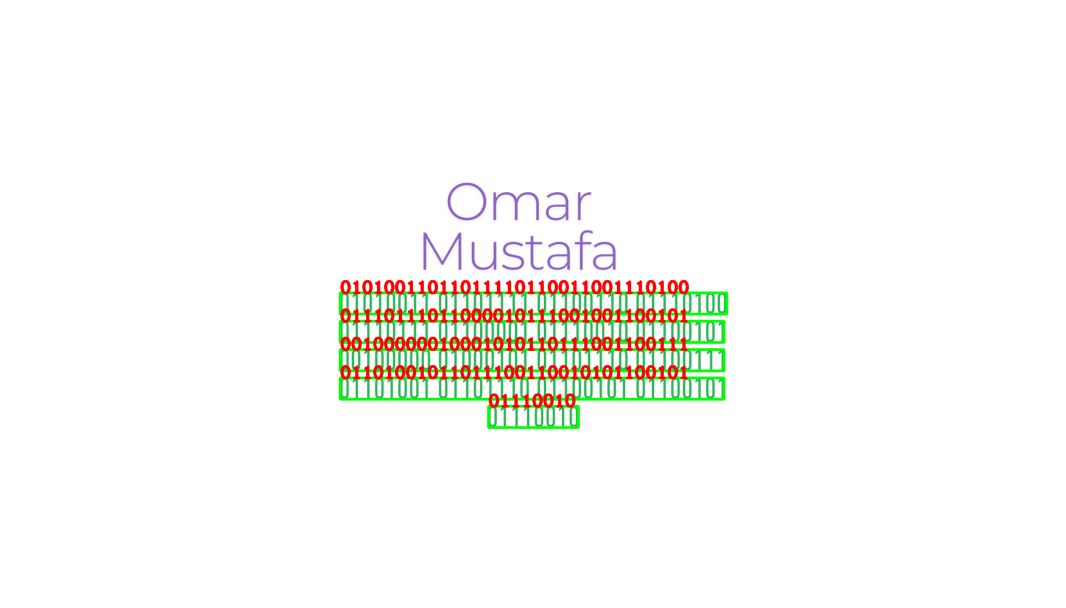

In [76]:
img_3 = cv2.imread(image_file).copy()
config = r'--oem 3 --psm 6 outputbase digits'
boxes = pytesseract.pytesseract.image_to_data(img_3, lang='eng', config=config)
print(boxes)
for x, b in enumerate(boxes.splitlines()):
    if x != 0:
        b = b.split()
        if len(b) == 12:
            x, y, w, h = int(b[6]), int(b[7]), int(b[8]), int(b[9])
            cv2.rectangle(img_3, (x,y), (x+w, y+h), (0,255,0), 3) 
            cv2.putText(img_3, b[11], (x,y), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 3)

cv2.imwrite('temp/OmarDigitsRectangled.png', img_3)
display('temp/OmarDigitsRectangled.png')

#### And to detect the digits only, but one digit at a time

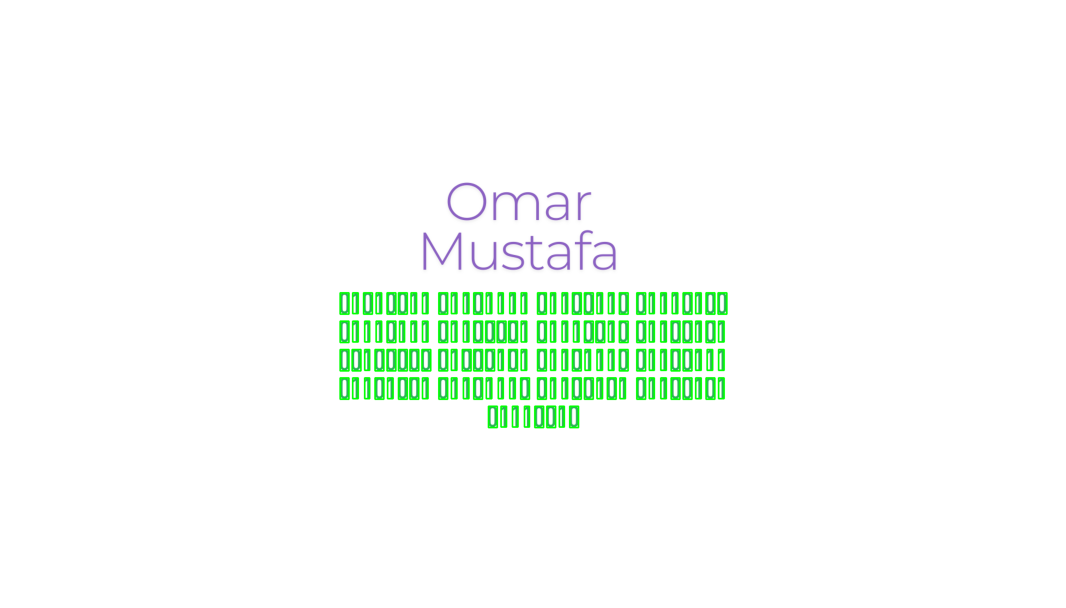

In [77]:
img_4 = cv2.imread(image_file).copy()
config = r'--oem 3 --psm 6 outputbase digits'
#Let's try image_to_boxes to draw boxes around the characters
boxes = pytesseract.pytesseract.image_to_boxes(img_4, lang='eng', config= config)

#lets draw rectangles around the characters
for b in boxes.splitlines():
    b = b.split(" ")
    char, x1, y1, x2, y2, _ = b
    # OpenCV uses (x, y) with (0,0) at the top-left. Tesseract's y-coordinates are flipped.
    y1, y2 = Himg - int(y1), Himg - int(y2)
    x1, x2 = int(x1), int(x2)
    # Draw a rectangle
    cv2.rectangle(img_4, (x1, y1), (x2, y2), (0, 255, 0), 2)
    #cv2.putText(img, b[0], (x1+10, y1+15), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0,0,255), 1)

cv2.imwrite('temp/OmarDigitsRectangledOnebyOne.png', img_4)
display('temp/OmarDigitsRectangledOnebyOne.png')